# Simple outlier detection

Import the necessary libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np

Parameters for the oulier detection:
   - WINDOW: The size of the rolling window used to calculate the mean and standard deviation
   - DEV: multiplication factor for the standard deviation for a point to count as an outlier

In [2]:
WINDOW = 5
DEV = 1.5

Read the data

In [3]:
data = pd.read_csv('train', usecols=["click", "hour"])

Aggregate by hour and calculate the number of clicks and the number of impressions

In [4]:
ctr = data.groupby('hour').agg({'click':[np.sum, 'count']})

In [5]:
ctr.columns = ctr.columns.to_flat_index()

In [6]:
ctr.rename(columns = {('click',   'sum'): 'clicks', ('click',   'count'): 'impressions'}, inplace=True)

In [7]:
ctr.reset_index(drop=False, inplace=True)

Calculate the click throug rate (CTR)

In [8]:
ctr['ctr'] = ctr['clicks'] / ctr['impressions']

In [9]:
ctr['date'] = pd.to_datetime(ctr['hour'], format="%y%m%d%H")

In [10]:
ctr

,hour,clicks,impressions,ctr,date
0,14102100,20792,119006,0.174714,2014-10-21 00:00:00
1,14102101,23873,137442,0.173695,2014-10-21 01:00:00
2,14102102,31265,207471,0.150696,2014-10-21 02:00:00
3,14102103,32830,193355,0.169791,2014-10-21 03:00:00
4,14102104,40026,264711,0.151206,2014-10-21 04:00:00
...,...,...,...,...,...
235,14103019,26046,134243,0.194021,2014-10-30 19:00:00
236,14103020,20820,110764,0.187967,2014-10-30 20:00:00
237,14103021,20958,112238,0.186728,2014-10-30 21:00:00
238,14103022,17328,101250,0.171141,2014-10-30 22:00:00


Plot CTR in function of time

Text(0, 0.5, 'CTR')

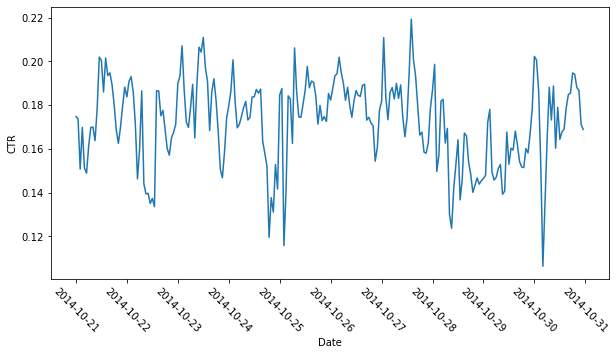

In [11]:
pl.figure(figsize=(10, 5))
pl.plot(ctr['date'], ctr['ctr'])

pl.xticks(rotation=-45)

pl.xlabel('Date')
pl.ylabel('CTR')

Calculate the rolling average and deviation

In [12]:
ctr['mean'] = ctr['ctr'].rolling(WINDOW, center=True).mean()
ctr['std'] = ctr['ctr'].rolling(WINDOW, center=True).std()

In [13]:
ctr

,hour,clicks,impressions,ctr,date,mean,std
0,14102100,20792,119006,0.174714,2014-10-21 00:00:00,NaN,NaN
1,14102101,23873,137442,0.173695,2014-10-21 01:00:00,NaN,NaN
2,14102102,31265,207471,0.150696,2014-10-21 02:00:00,0.164020,0.012073
3,14102103,32830,193355,0.169791,2014-10-21 03:00:00,0.158847,0.011886
4,14102104,40026,264711,0.151206,2014-10-21 04:00:00,0.156359,0.008938
...,...,...,...,...,...,...,...
235,14103019,26046,134243,0.194021,2014-10-30 19:00:00,0.189764,0.004286
236,14103020,20820,110764,0.187967,2014-10-30 20:00:00,0.186906,0.009495
237,14103021,20958,112238,0.186728,2014-10-30 21:00:00,0.181739,0.011106
238,14103022,17328,101250,0.171141,2014-10-30 22:00:00,NaN,NaN


Check which points are outliers and make the plot

In [14]:
out = (ctr['ctr'] > ctr['mean'] + DEV * ctr['std']) | (ctr['ctr'] < ctr['mean'] -DEV * ctr['std'])

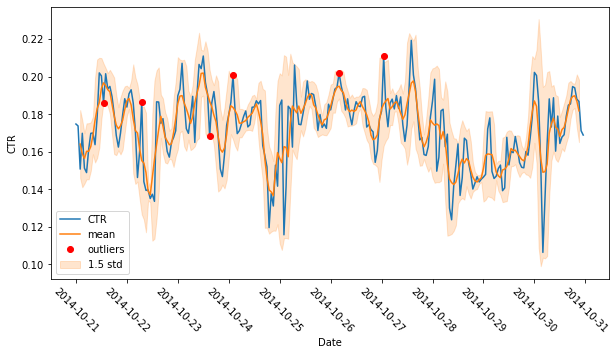

In [15]:
pl.figure(figsize=(10, 5))
pl.plot(ctr['date'], ctr['ctr'], '-C0', label='CTR')
pl.plot(ctr['date'], ctr['mean'], '-C1', label='mean')

minc, maxc = ctr['mean']-DEV*ctr['std'], ctr['mean']+DEV*ctr['std']
s = ~ctr['mean'].isna()
pl.fill_between(ctr['date'][s], minc[s], maxc[s], color='C1', alpha=0.2, label='{} std'.format(DEV))
pl.plot(ctr['date'][out], ctr['ctr'][out], 'or', label='outliers')

pl.xticks(rotation=-45)

pl.xlabel('Date')
pl.ylabel('CTR')
pl.legend()